## Laboratorium 3

### Opis
Celem laboratorium jest klasyfikacja liści za pomocą metody *k* najbliższych sąsiadów - *k*NN (*k Nearest Neighbors*) z wykorzystaniem normalizacji.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```



### Zadanie 1

* Wybierz 10 dowolnych gatunków liści (będziesz je używać w kolejnych zadaniach) oraz wszystkie cechy.
* Przeprowadź klasyfikację za pomocą klasyfikatora [*k*NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
* Znajdź optymalne *k*.
* Wyświetl najwyższy wynik klasyfikacji (*accuracy*).


In [10]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classes = list(range(0,10))

train = train[np.isin(train[:, 0], classes)]
test = test[np.isin(test[:, 0], classes)]
y_train = train[:,0]
# X_train = np.delete(train_np, 1, axis=1)
X_train = train[:,2:]

# for i in range(0,12):
#     print(f"liczba próbek: {i}: wynosi: {sum(y_train[:] == i)}")
#     print(f"liczba próbek: {i}: wynosi: {sum(y_test[:] == i)}")

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_test = test[:,0]
# X_test = np.delete(test_np, 1, axis=1)
X_test = test[:,2:]
predictions = neigh.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7619047619047619


The best: 0.79% at k = 24


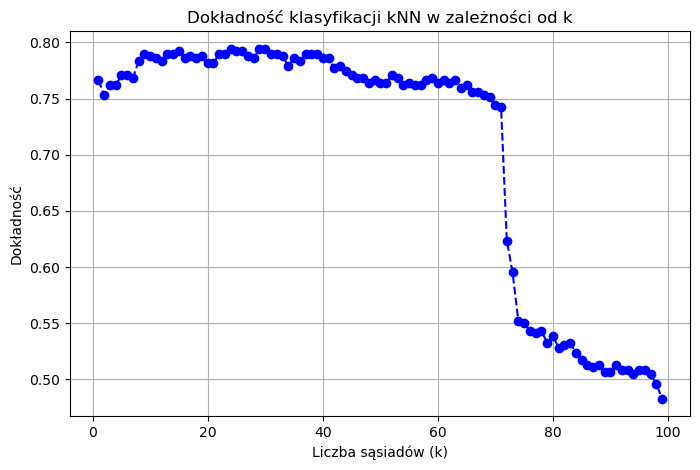

In [12]:
import matplotlib.pyplot as plt
accuracies = []
iterations = 100

for k in range(1, iterations):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

maks = max(accuracies)
print(f"The best: {maks:.2f}% at k = {accuracies.index(maks) + 1}")
plt.figure(figsize=(8, 5))
plt.plot(range(1, iterations), accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("Liczba sąsiadów (k)")
plt.ylabel("Dokładność")
plt.title("Dokładność klasyfikacji kNN w zależności od k")
plt.grid()
plt.show()

### Zadanie 2
* Znormalizuj dane w zakresie 0-1. Możesz do tego celu wykorzystać gotową funkcję z biblioteki scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.
>    **Ważne: współczynniki powinny być obliczone na zbiorze treningowym i te same powinny zostać zastosowane do normalizacji zbioru testowego.**
* Ponownie wykonaj klasyfikację z tymi samymi parametrami (co w zadaniu 1), ale na danych znormalizowanych.
* Znajdź optymalne *k*.
* Wyświetl wynik w postaci wykresu, gdzie na osi X znajduje się *k*, a na osi Y *accuracy*.
* Wyświetl najwyższy wynik klasyfikacji (*accuracy*).


The best: 0.84% at k = 12


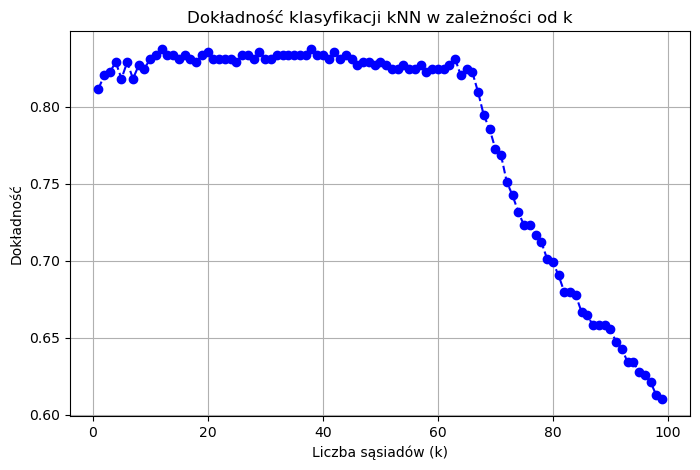

In [13]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

train_scaler = MinMaxScaler()
train_scaler.fit(X_train)

X_train = train_scaler.transform(X_train)
X_test = train_scaler.transform(X_test)

accuracies = []
iterations = 100

for k in range(1, iterations):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

maks = max(accuracies)
print(f"The best: {maks:.2f}% at k = {accuracies.index(maks) + 1}")
plt.figure(figsize=(8, 5))
plt.plot(range(1, iterations), accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("Liczba sąsiadów (k)")
plt.ylabel("Dokładność")
plt.title("Dokładność klasyfikacji kNN w zależności od k")
plt.grid()
plt.show()

### Zadanie 3

Napisz wnioski